# Convolutional Network 

*The convolution operation*
- A *Dense Layer* learn global patterns in the input layer space : in MNIST digits patterns  are involving all pixels.

- Whereas a *convolutional layer* learns a local patterns (specific area in a picture for example)

There is two notion to know :

<u>*1)Padding*</u>: It's the fact to add *2n* lines and columns of zeros to capture more information of the border . Because if we don't use padding , we "eat" the image's border information .  
<u>Example</u>: 3x3 filter on a 5x5 picture outputs a 3x3 image  
https://www.youtube.com/watch?v=-1xVmU8Z6Bs&t=75s

*Valid* padding in keras means no padding.  
*Same*  padding in keras allows to output a matrix that has the *same* size of the input matrix

<u>*2)Stride*:</u> it's the step size of the convolution filter (kernel) as it moves across the input image.  
*Example*:  
stride = 1 : the kernel moves 1 pixel at a time  
stride = 2 : the kernel moves 2 pixels at a time → the output becomes smaller,

*The final output size is:*   $\left\lfloor \frac{n - f}{S} + 1 \right\rfloor$  
Where:  
- *n* is the input size  
- *f* is the kernel size  
- *S* is the stride size


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Input, Dense,Flatten, Rescaling , ReLU
from keras.datasets import mnist
from keras.models import Sequential
import matplotlib.pyplot as plt

2025-09-25 18:28:49.770908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-25 18:28:50.142738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-25 18:28:51.438011: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
inputs = keras.Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

I0000 00:00:1758791044.091721   25092 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6292 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


2025-09-25 11:04:12.017638: I external/local_xla/xla/service/service.cc:163] XLA service 0x706a40005a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-25 11:04:12.017666: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-25 11:04:12.067197: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-25 11:04:12.299981: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90300


 60/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5256 - loss: 1.3949

I0000 00:00:1758791056.545108   26057 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9494 - loss: 0.1619
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9855 - loss: 0.0459
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9902 - loss: 0.0312
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9926 - loss: 0.0235
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0187


*Example with cat and dog dataset*

In [13]:
import os , shutil , pathlib

In [14]:
original_dir = pathlib.Path("dogs-vs-cats/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name,start_index,end_index):
    for cat in ('cat','dog'):
        dir = new_base_dir/subset_name/cat
        os.makedirs(dir)
        fnames = [f"{cat}.{i}.jpg"for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
            dst=dir / fname)
        

In [ ]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [31]:
inputs = keras.Input(shape=(180,180,3))
x = Rescaling(1./255)(inputs)
x = Conv2D(filters=32,kernel_size=3, activation=None)(x)
x = MaxPooling2D(pool_size=2)(x)
x = ReLU()(x)
x = Conv2D(filters=64,kernel_size=3, activation=None)(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation=None)(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation=None)(x)
x = ReLU()(x)
x = MaxPooling2D(pool_size=2)(x)
x = Flatten()(x)

outputs = Dense(units=1,activation="sigmoid")(x)
model = keras.Model(inputs= inputs, outputs = outputs)

In [11]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        20,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,153 (1.56 MB)

 Trainable params: 409,153 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy', optimizer="rmsprop",metrics=["accuracy"])

*How to take the pictures and convert them to a Tensor?*  

We use the : *image_dataset_from_directory()* command

In [15]:
from keras.utils import image_dataset_from_directory
from keras.callbacks import ModelCheckpoint

train_dataset = image_dataset_from_directory(directory=new_base_dir/"train",image_size=(180,180), batch_size=32)
validation_dataset = image_dataset_from_directory(directory=new_base_dir/"validation",image_size=(180,180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test",image_size=(180, 180),batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [27]:
callbacks = [ModelCheckpoint(filepath="convnet.keras",monitor='val_loss', save_best_only=True)]

In [34]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs = 40,
        validation_data = validation_dataset,
        callbacks= callbacks
    )

Epoch 1/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.5280 - loss: 0.6991 - val_accuracy: 0.5000 - val_loss: 0.6984
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5930 - loss: 0.6789 - val_accuracy: 0.5000 - val_loss: 0.8354
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6550 - loss: 0.6296 - val_accuracy: 0.6410 - val_loss: 0.6553
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7000 - loss: 0.5764 - val_accuracy: 0.6800 - val_loss: 0.5862
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7275 - loss: 0.5428 - val_accuracy: 0.7070 - val_loss: 0.5600
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7570 - loss: 0.5069 - val_accuracy: 0.6830 - val_loss: 0.5820
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7775 - loss: 0.4658 - val_accuracy: 0.7590 - val_loss: 0.5292
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7980 - loss: 0.4384 - val_accuracy: 0.7350 -

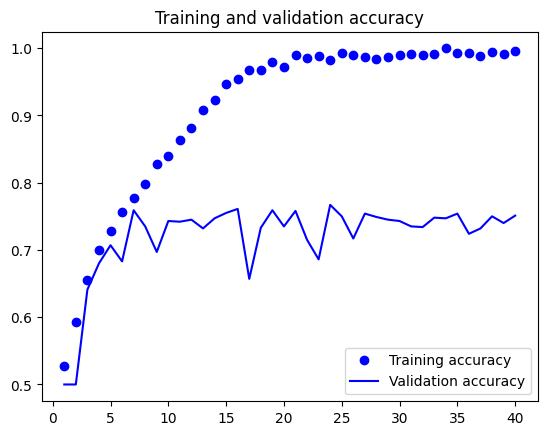

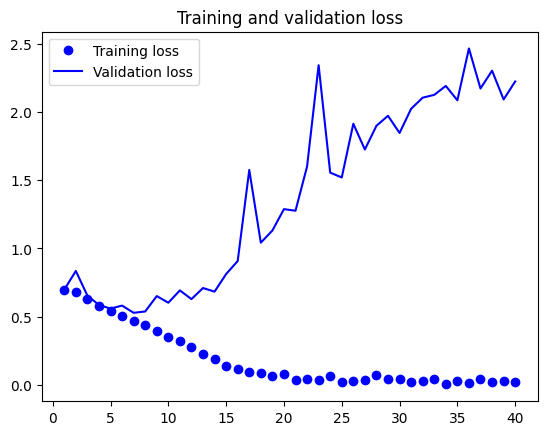

In [35]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [1]:
test_model = keras.models.load_model("convnet.keras")
test_loss , test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

NameError: name 'keras' is not defined

# Pre-trained models

There is two part in a CNN:  
1)*The conv base*: where the NN learns every small feature of the data  
2)*The classifier*: where the NN try to classify the data

In general we only want to reuse the *conv base* because of the fact that the features learned by the conv base are generic , the feature map of a convnet contains a lot of useful features of a picture that don't depend of the CV problem.

In contrast , the representations learned by the classifier will necessarily be
specific to the set of classes on which the model was trained

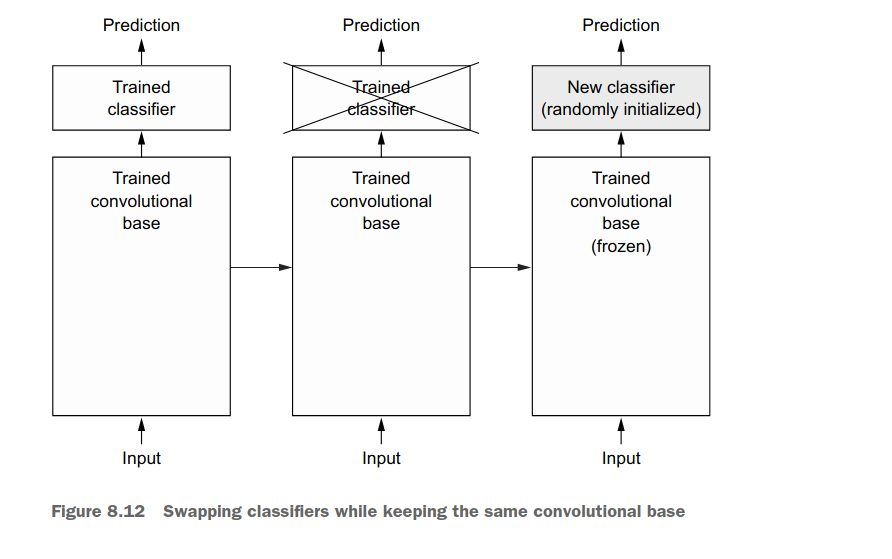

At the beginning of a CNN , the first layers learn simple features (borders, color contrast and textures) , whereas layers that  higher up extract more-abstract concept (eyes, nose, wheel)

In [3]:
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint

*arguments:*  

*include_top*: whether to include the 3 fully-connected layers at the top of the network.  
*weights*: one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.  
*input_shape*: the input shape of the tensor

In [5]:
conv_base = VGG16(include_top=False,weights='imagenet',input_shape=(180,180,3))

I0000 00:00:1758817753.412066    4657 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6243 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Now we just want to add a *Dense Layer* at the top of the *conv_base* and then train only this new classifier while keeping the convolutional base *frozen*, so that we can adapt the model to our dataset without destroying the pretrained features (catastrophic forgetting)

In [7]:
#Let's freeze the weights to avoid doing backpropagation on them

conv_base.trainable = False


In [26]:
data_aug= keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomRotation(0.1)
    ]
)

inputs = keras.Input((180,180,3))
x = data_aug(inputs)
#let the pre-trained model scales the data as he wants 
x = tf.keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs,outputs)
model.compile(loss="binary_crossentropy",optimizer='rmsprop', metrics=['accuracy'])


In [9]:
callbacks = [ModelCheckpoint(
    filepath="vgg16.keras",monitor='val_loss',save_best_only=True
)]

In [16]:
history = model.fit(
    train_dataset,
    epochs = 50,
    validation_data= validation_dataset,
    callbacks = callbacks
)

Epoch 1/50


2025-09-25 18:29:43.416486: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90300


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.8965 - loss: 23.0937 - val_accuracy: 0.9660 - val_loss: 4.3423
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9465 - loss: 6.1674 - val_accuracy: 0.9690 - val_loss: 3.7226
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9560 - loss: 5.9831 - val_accuracy: 0.9720 - val_loss: 3.5183
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9600 - loss: 5.3224 - val_accuracy: 0.9690 - val_loss: 3.7377
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9620 - loss: 4.2963 - val_accuracy: 0.9710 - val_loss: 3.8775
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9700 - loss: 3.1627 - val_accuracy: 0.9760 - val_loss: 3.1058
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9745 - loss: 2.3315 - val_accuracy: 0.9710 - val_loss: 4.1945
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9690 - loss: 3.5708 - val_accuracy: 0.9790 - va

In [17]:
import matplotlib.pyplot as plt


def plotting_result(accuracy,val_accuracy,loss,val_loss):
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()
    return 


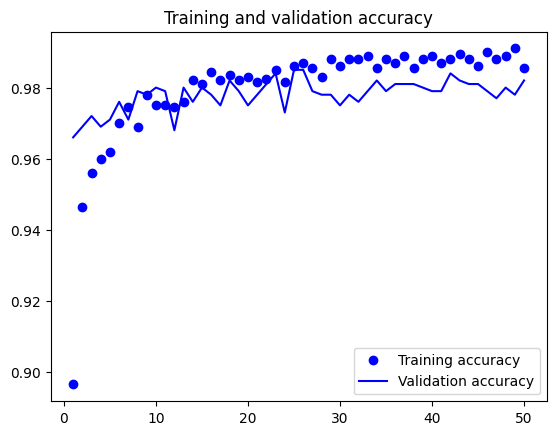

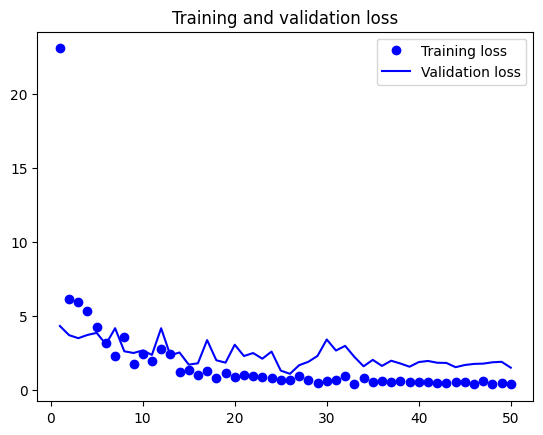

In [18]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plotting_result(accuracy,val_accuracy,loss,val_loss)

In [19]:
test_model = keras.models.load_model("vgg16.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9790 - loss: 2.2458
Test accuracy: 0.979


# Batch normalization 

We normalize the outputs of *every* layers to avoir having exploding gradients .  
It allows to :
- Center the data around zero and make the variance equal to 1
- Achieves the same accuracy faster
- Reduces the need for other regularization 
- Epochs take longer 

Here are the steps:  
1) Take the output normalize it , we obtain â
2) Then we scale it by a factor b and shift it by r :
$$
z^{(i)} = b \cdot \hat{a}^{(i)} + r
$$


# Fine tuning 

Fine tunning beginns by features extraction and then we unfreeze some layers that are on the top of the network and we train them .  

It allows the model to adapt to some features that are only present on our dataset

Here are the steps:
1) Add our custom network on top of an already-trained base network.
2) Freeze the base network
3) Train the dense part we added
4) Unfreeze some layers in the base network 
5) Jointly train both these layers and the part we added.

In [21]:
conv_base.trainable = True
#We only train the last 4 layers weights
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_aug= keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomRotation(0.1)
    ]
)

inputs = keras.Input((180,180,3))
x = data_aug(inputs)
#let the pre-trained model scales the data as he wants 
x = tf.keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = Flatten()(x)
x = Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = Dense(1,activation='sigmoid')(x)
model2 = keras.Model(inputs,outputs)

model2.compile(loss= 'binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])
callbacks = [ModelCheckpoint(filepath='fine_tuning.keras',monitor='val_loss',save_best_only=True)]

history2 = model2.fit(
    train_dataset,
    epochs= 30,
    validation_data = validation_dataset, 
    callbacks = callbacks
)
